![Clothing Classifier Model](images/Clothing%20Classifier%20Model.png)

_Fashion Forward_ is a new AI-based e-commerce clothing retailer. They want to use image classification to automatically categorize new product listings, making it easier for customers to find what they're looking for. It will also assist in inventory management by quickly sorting items.

As a data scientist tasked with implementing a clothing classifier, your primary objective is to develop a deep learning model capable of accurately categorizing images of clothing items into distinct garment types such as shirts, trousers, shoes, etc.

In [198]:
# Run the cells below first
from tensorflow.keras import layers, models, Sequential
from keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
import numpy as np

# Load the MNIST datasets as NumPy arrays
train_images, train_labels, test_images, test_labels = (np.load('data/fashion_mnist.npz')[key] 
                                    for key in ['train_images', 'train_labels', 'test_images', 'test_labels'])

In [199]:
train_images.shape

(30000, 28, 28)

In [200]:
# split for validation test
val_images, val_labels = train_images[25000:30000,:], train_labels[25000:30000]
train_images, train_labels = train_images[:25000,:], train_labels[:25000]
train_images.shape

(25000, 28, 28)

In [201]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [202]:
# reshape data
train_images = train_images.reshape(train_images.shape[0],28,28,1)
val_images = val_images.reshape(val_images.shape[0],28,28,1)
test_images = test_images.reshape(test_images.shape[0],28,28,1)

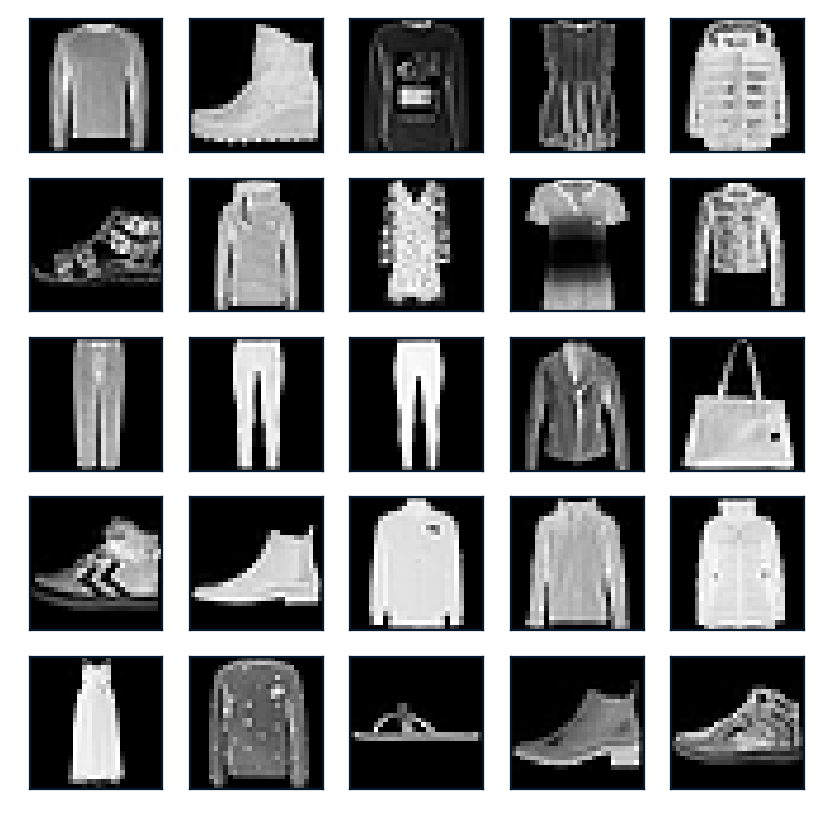

In [203]:
# Visualize a sample of images
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i]/255.0, cmap='gray')
plt.show()

In [204]:
# Start coding here
# Build CNN model

model = Sequential()

# Convolution layer
model.add(Conv2D(32, (3,3),activation = 'relu', input_shape = (28,28,1)))

# Convolution layer 2
model.add(Conv2D(16, (3,3), activation = 'relu'))

# Flatten
model.add(Flatten())

# Fully connected layer
model.add(Dense(64, activation = 'relu', kernel_regularizer = l2(0.01)))
# Output layer
model.add(Dense(10, activation = 'softmax'))
# Use as many cells as you need

In [205]:
# Complie model
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [206]:
# Converting the labels
train_labels_onehot = to_categorical(train_labels)
val_labels_onehot = to_categorical(val_labels)
test_labels_onehot = to_categorical(test_labels)

In [207]:
# Fitting the model 
history = model.fit(train_images, train_labels_onehot, validation_data= (val_images, val_labels_onehot) , epochs= 10, batch_size = 32, verbose = 1)

Epoch 1/10
782/782 [==============================] - 34s 43ms/step - loss: 1.4774 - accuracy: 0.8030 - val_loss: 0.9484 - val_accuracy: 0.8382
Epoch 2/10
782/782 [==============================] - 33s 42ms/step - loss: 0.8191 - accuracy: 0.8568 - val_loss: 0.8022 - val_accuracy: 0.8440
Epoch 3/10
782/782 [==============================] - 33s 42ms/step - loss: 0.6950 - accuracy: 0.8684 - val_loss: 0.6830 - val_accuracy: 0.8582
Epoch 4/10
782/782 [==============================] - 33s 43ms/step - loss: 0.6341 - accuracy: 0.8778 - val_loss: 0.6877 - val_accuracy: 0.8626
Epoch 5/10
782/782 [==============================] - 33s 43ms/step - loss: 0.5977 - accuracy: 0.8844 - val_loss: 0.6643 - val_accuracy: 0.8682
Epoch 6/10
782/782 [==============================] - 34s 43ms/step - loss: 0.5894 - accuracy: 0.8890 - val_loss: 0.6537 - val_accuracy: 0.8706
Epoch 7/10
782/782 [==============================] - 33s 43ms/step - loss: 0.5672 - accuracy: 0.8938 - val_loss: 0.6537 - val_accuracy:

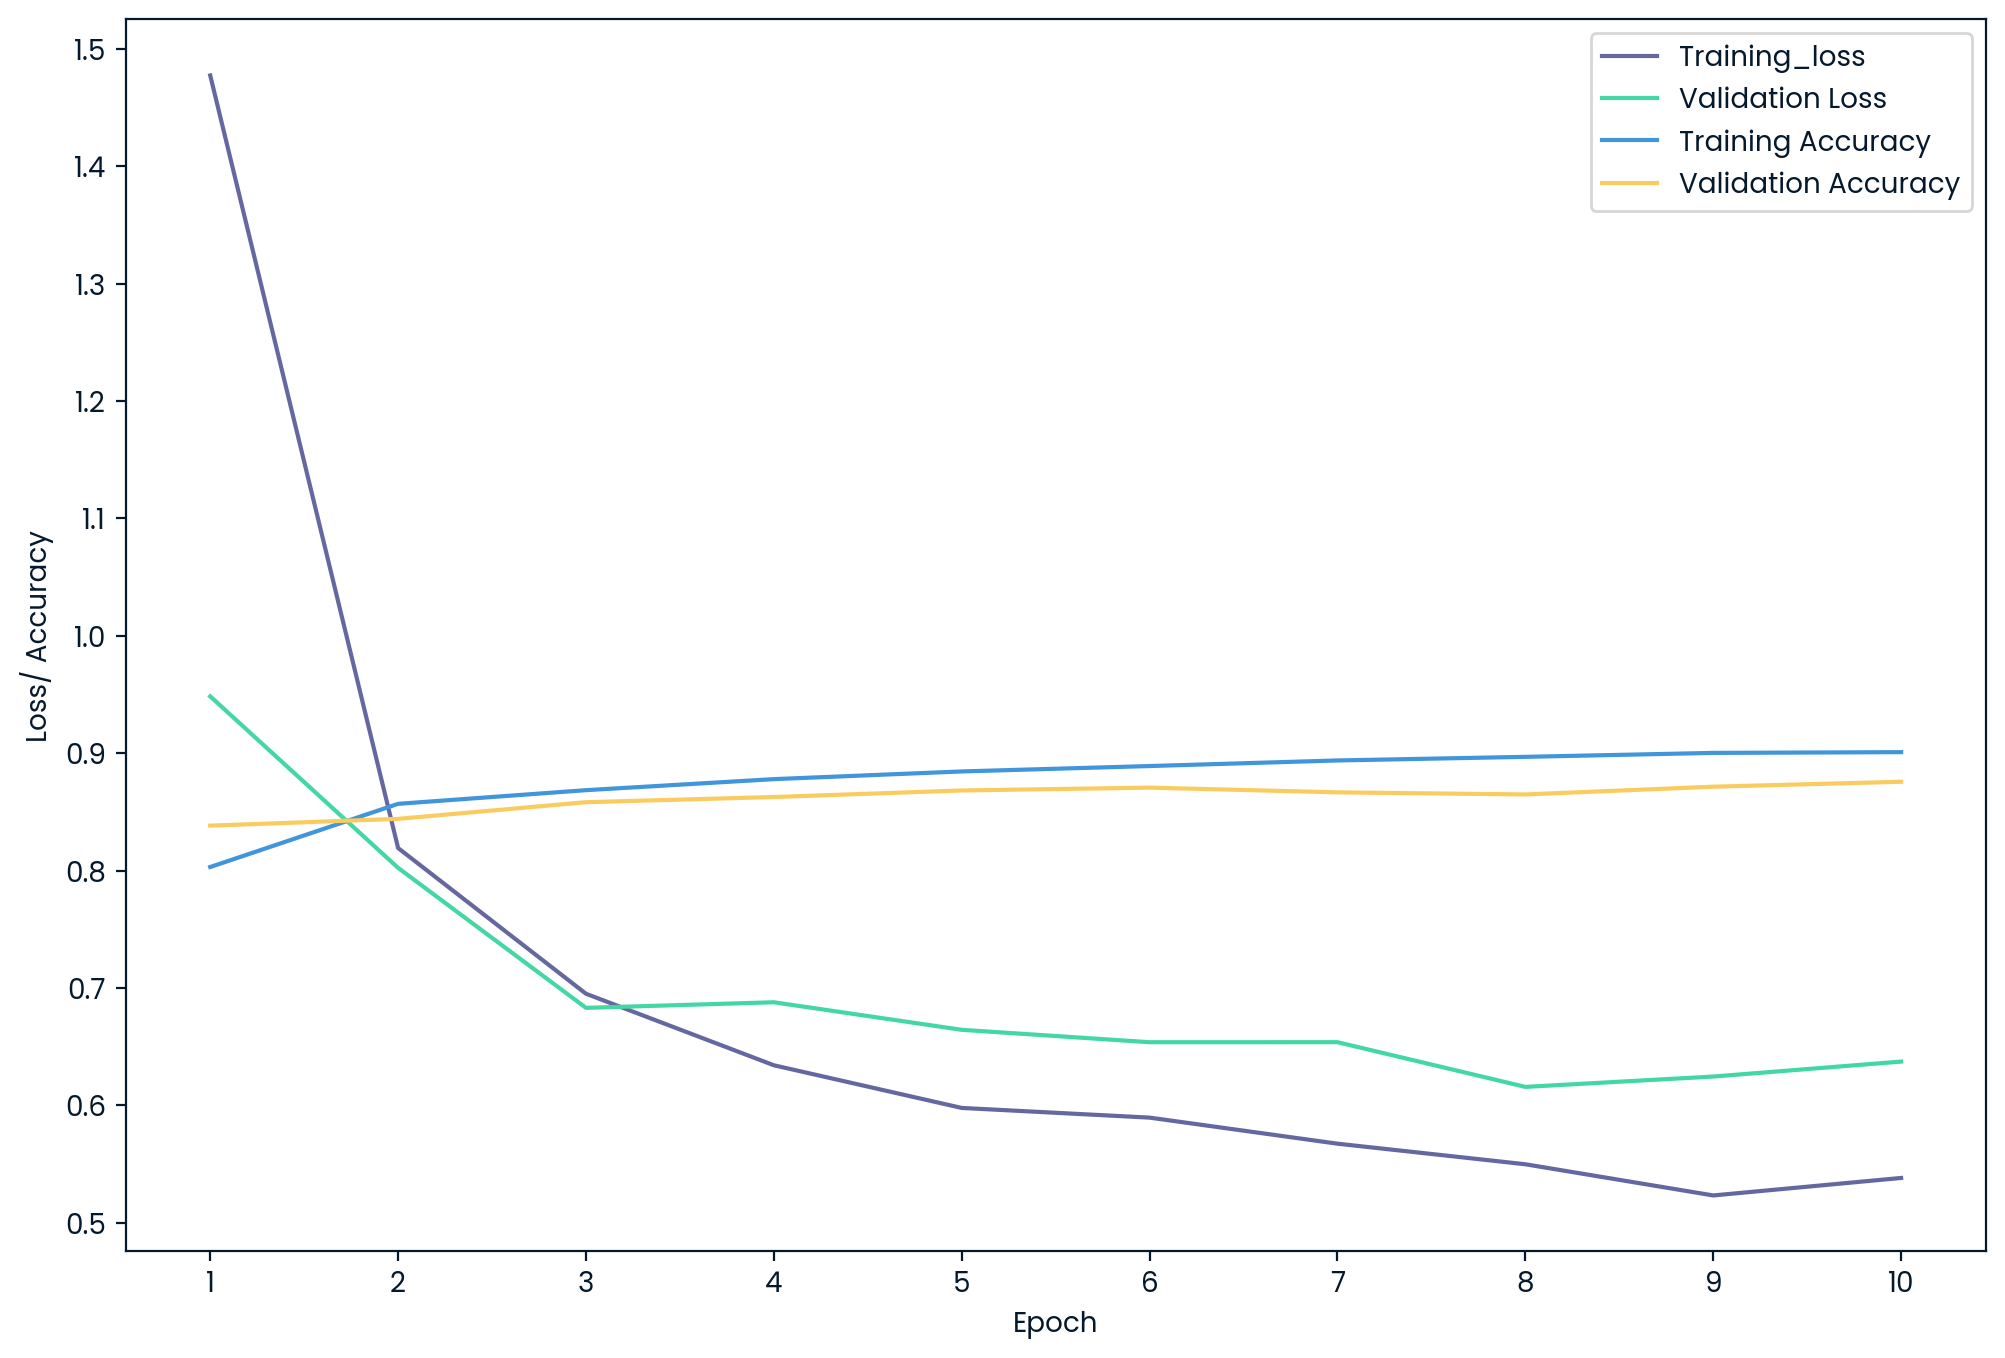

In [215]:
# Plotting loss, accuracy of train set and validation set
fig = plt.figure(figsize = (12,8))
numepoch = 10
plt.plot(np.arange(1,numepoch+1), history.history['loss'], label = 'Training_loss')
plt.plot(np.arange(1,numepoch+1), history.history['val_loss'], label = 'Validation Loss')
plt.plot(np.arange(1,numepoch+1), history.history['accuracy'], label = 'Training Accuracy')
plt.plot(np.arange(1,numepoch+1), history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xticks(np.arange(1,numepoch+1,1))
plt.yticks(np.arange(0.5,1.6,0.1))
plt.xlabel('Epoch')
plt.ylabel('Loss/ Accuracy')
plt.legend()
plt.show()

In [216]:
# evaluate models
score = model.evaluate(test_images, test_labels_onehot)
test_accuracy = score[-1]
print(f'Test accuracy:{test_accuracy:.2f}')

157/157 [==============================] - 1s 8ms/step - loss: 0.6477 - accuracy: 0.8732
Test accuracy:0.87


1/1 [==============================] - 0s 17ms/step


7

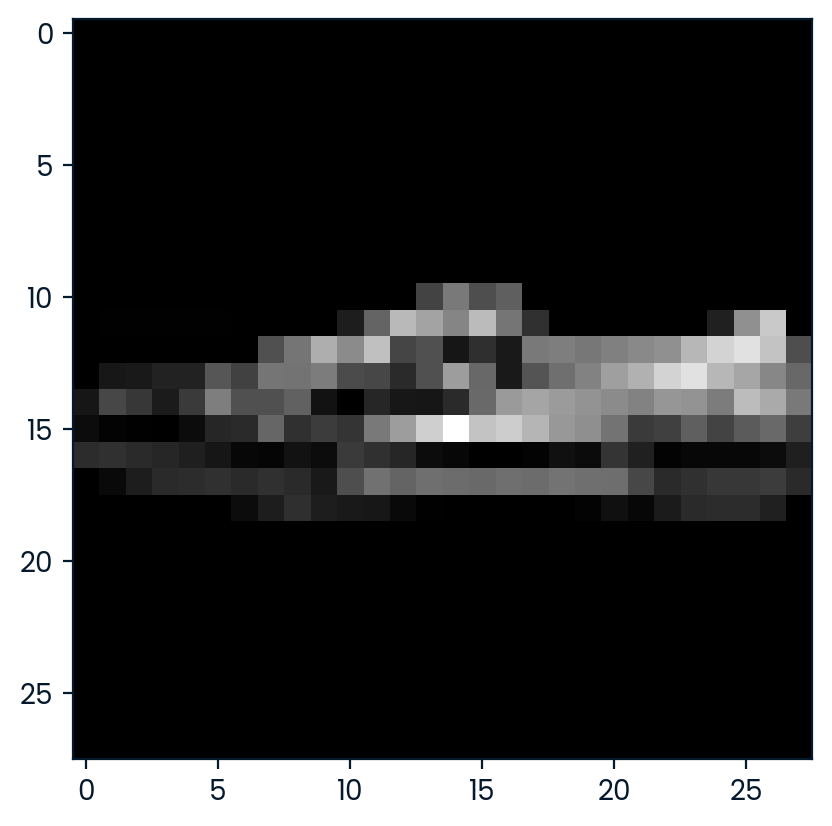

In [217]:
# Predict
plt.imshow(test_images[1].reshape(28,28), cmap = 'gray')

label_predict = model.predict(test_images[1].reshape(1,28,28,1))
np.argmax(label_predict)